<a href="https://colab.research.google.com/github/TanoyBosh/lstm-vs-svm/blob/main/DONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
17/17 [==============================] - 1s 14ms/step


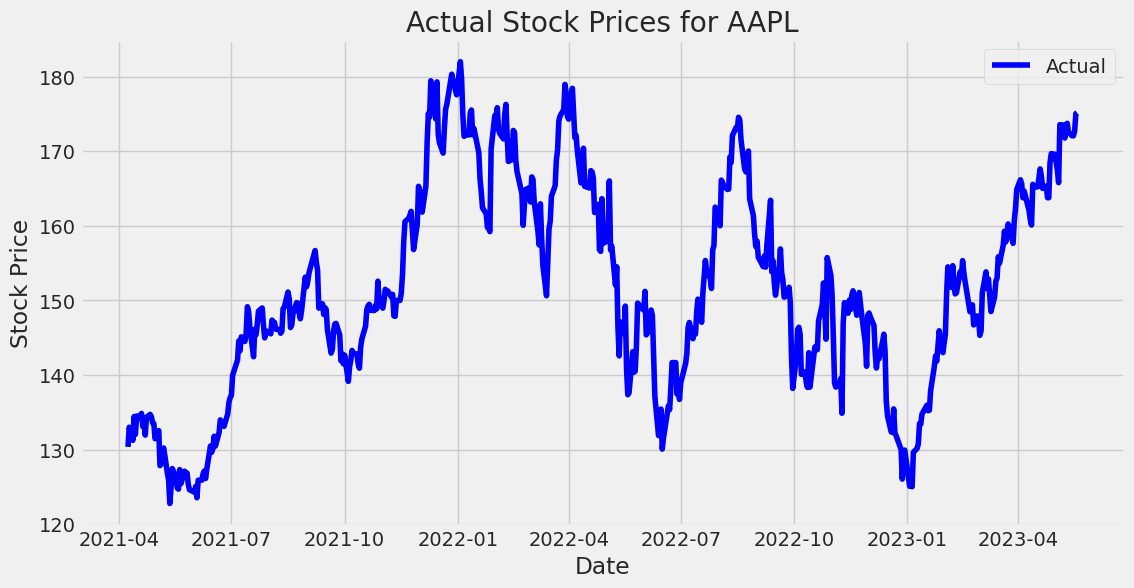

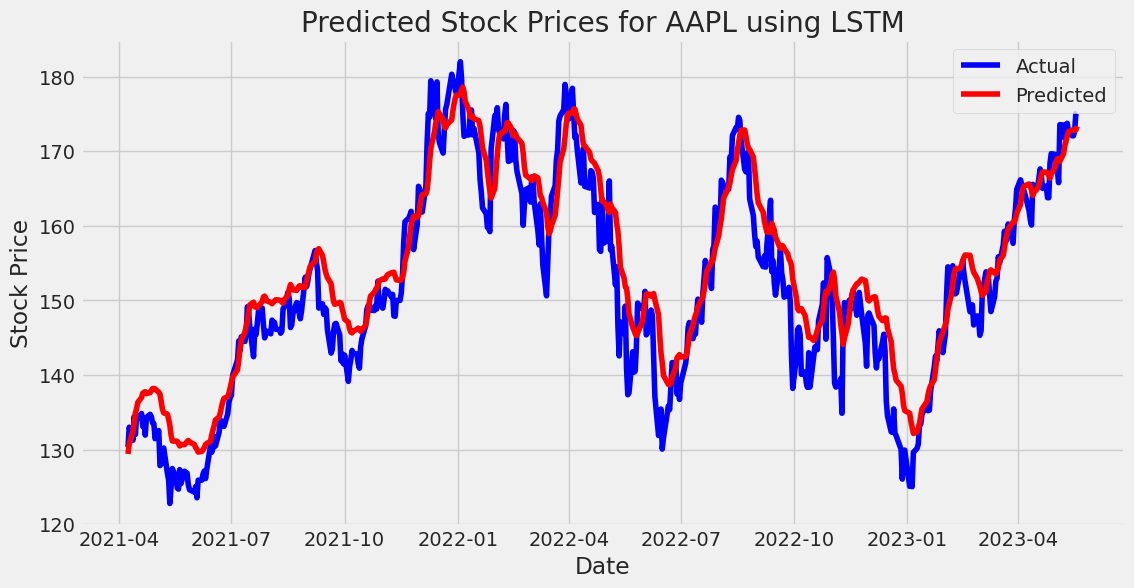

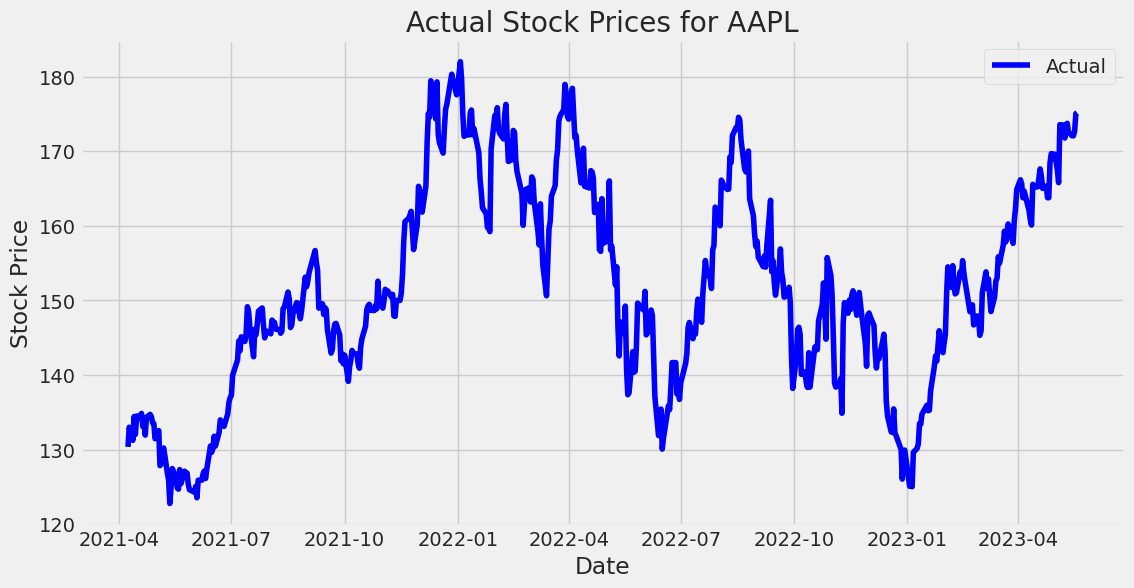

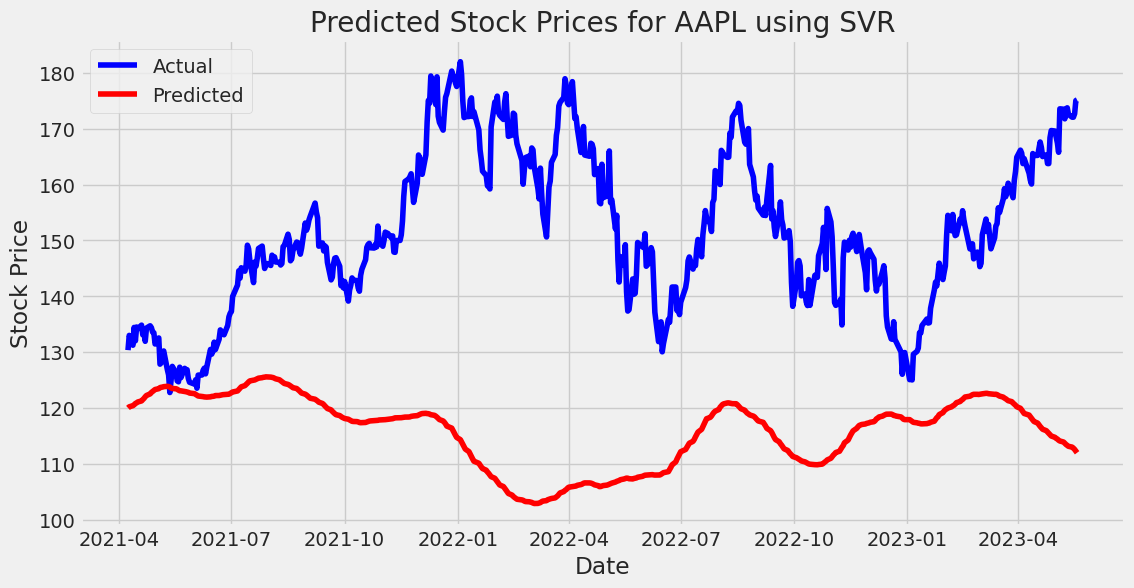

8/8 [==============================] - 1s 15ms/step


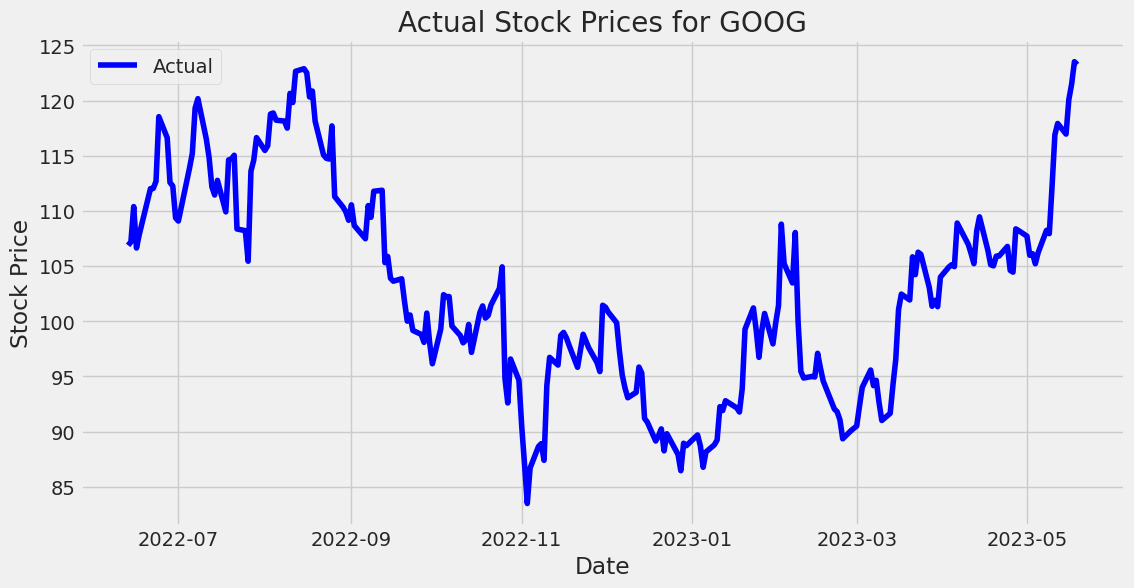

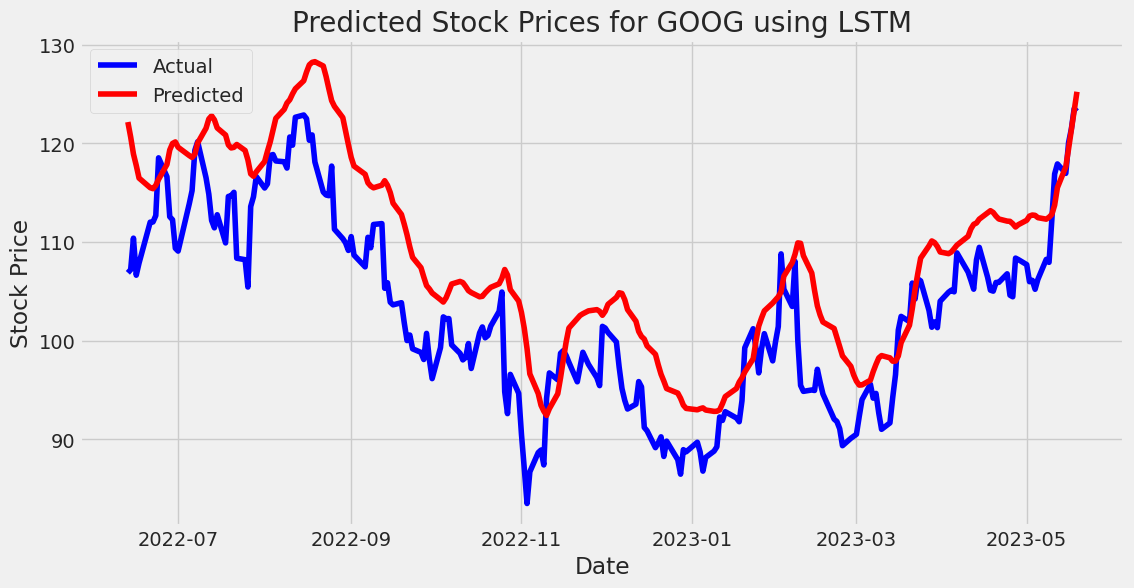

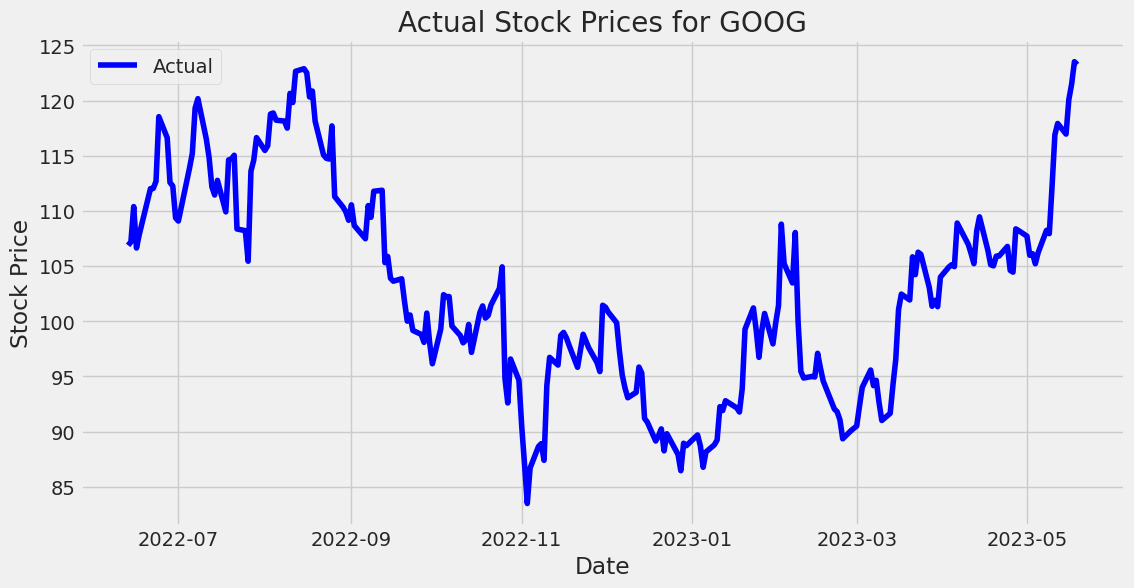

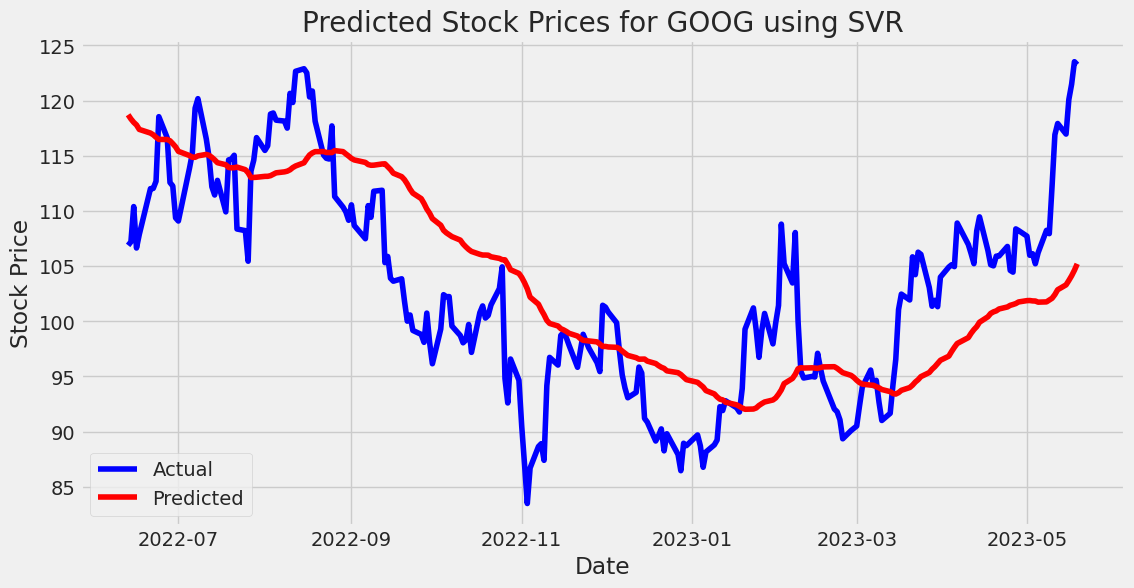

15/15 [==============================] - 1s 17ms/step


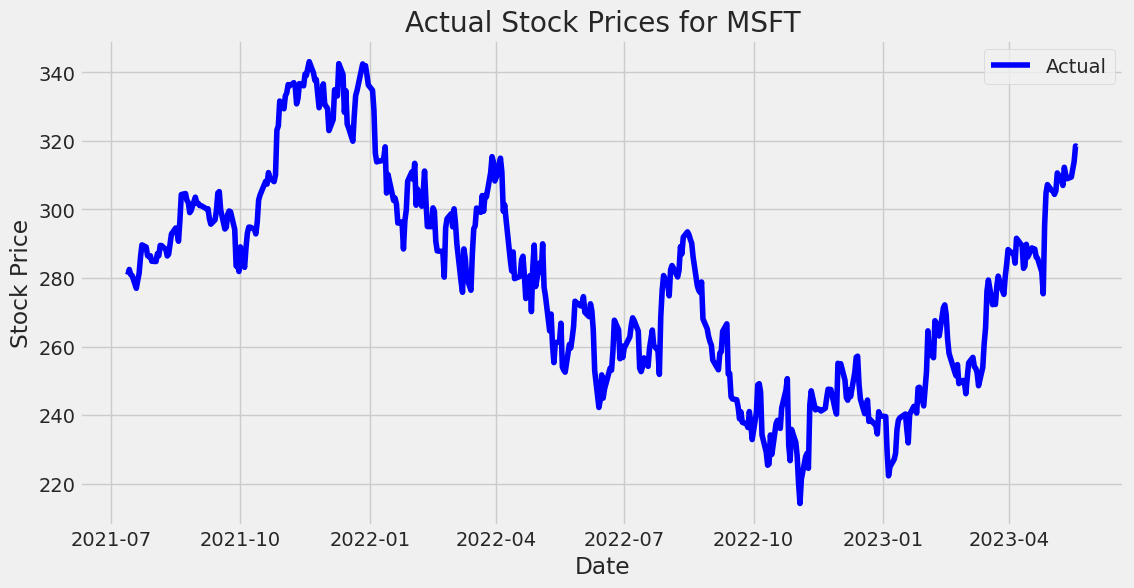

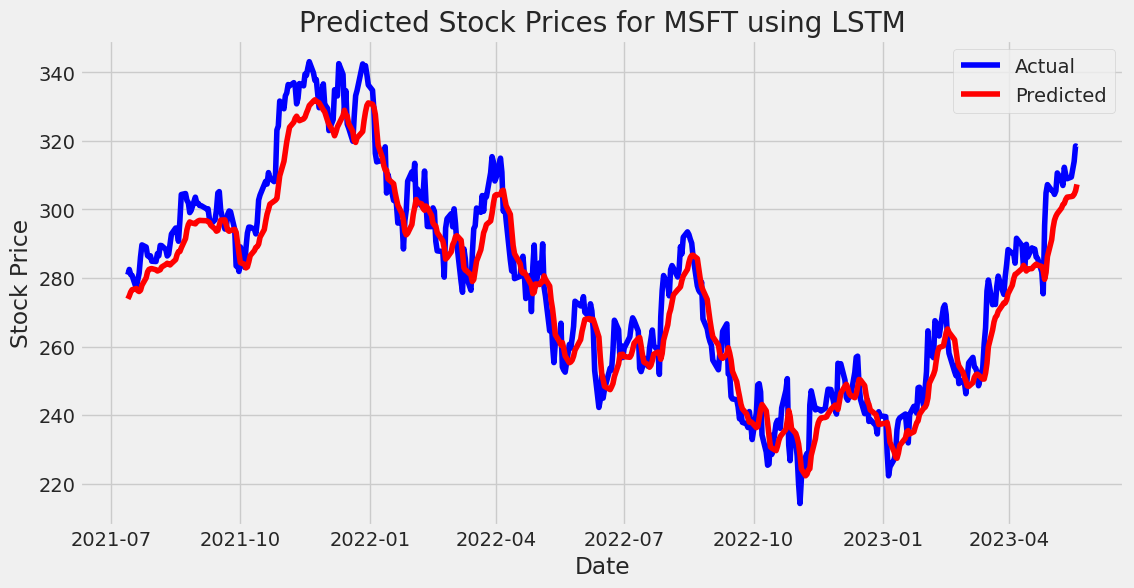

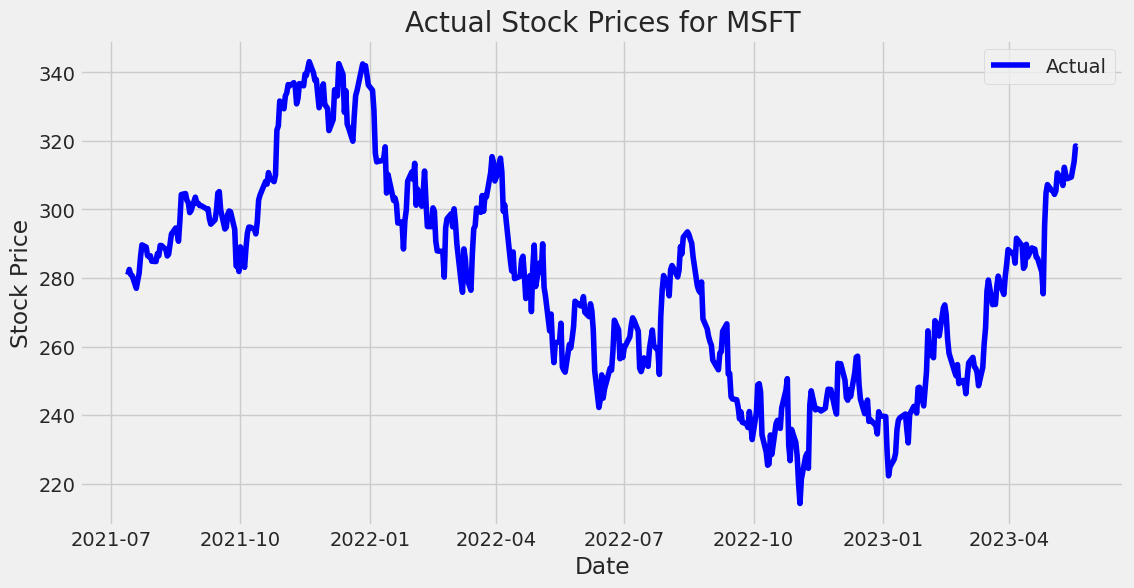

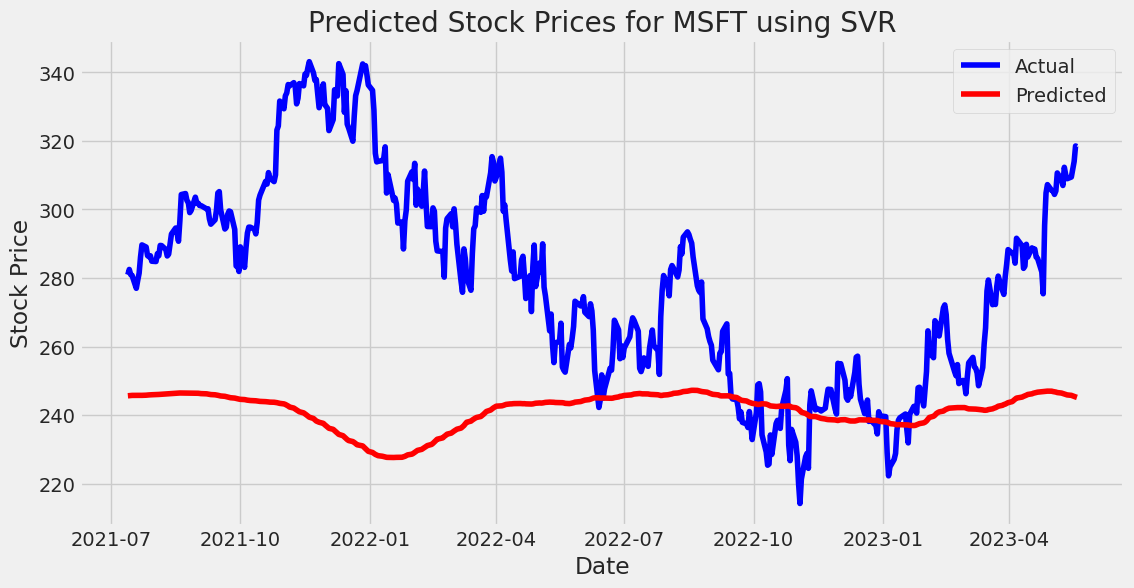

11/11 [==============================] - 1s 24ms/step


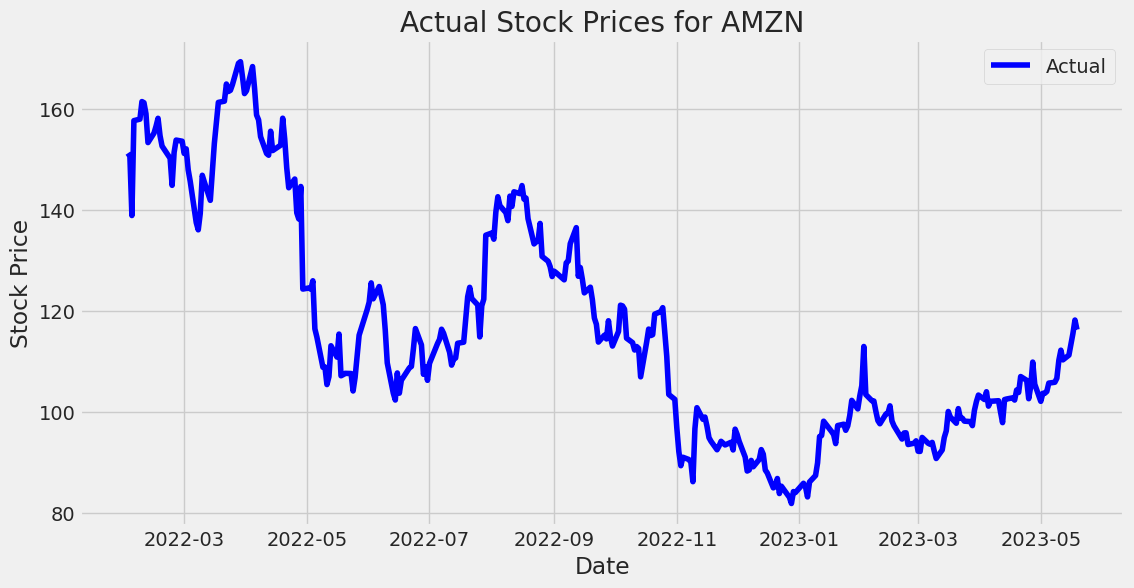

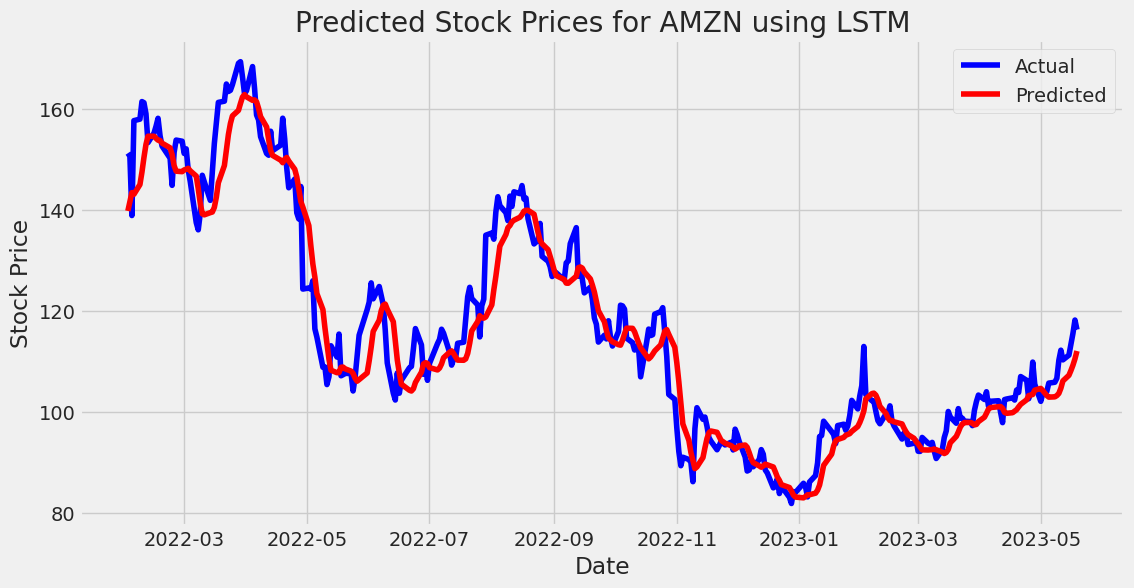

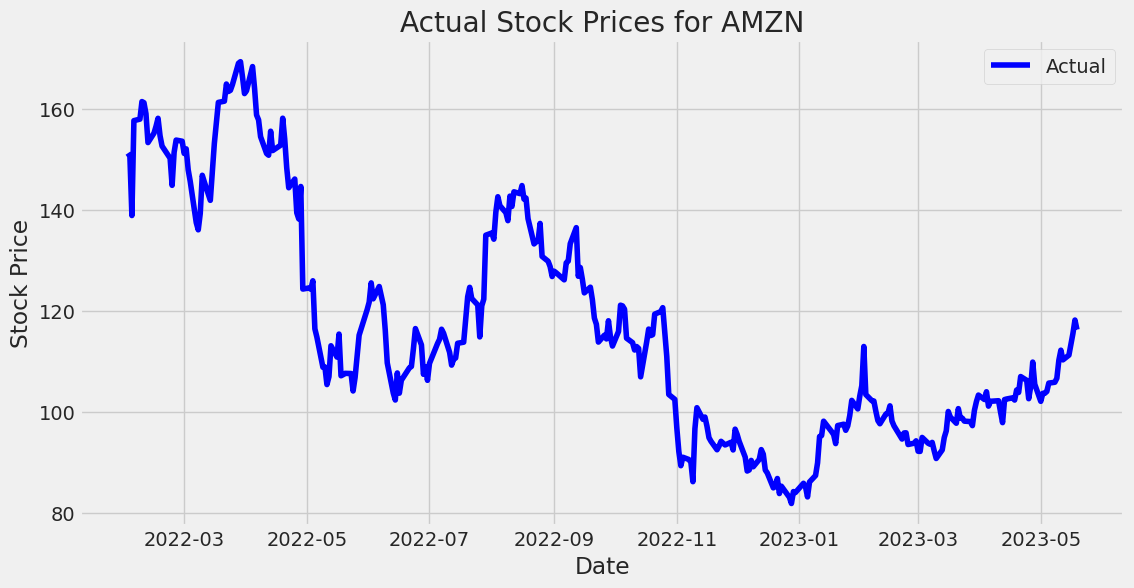

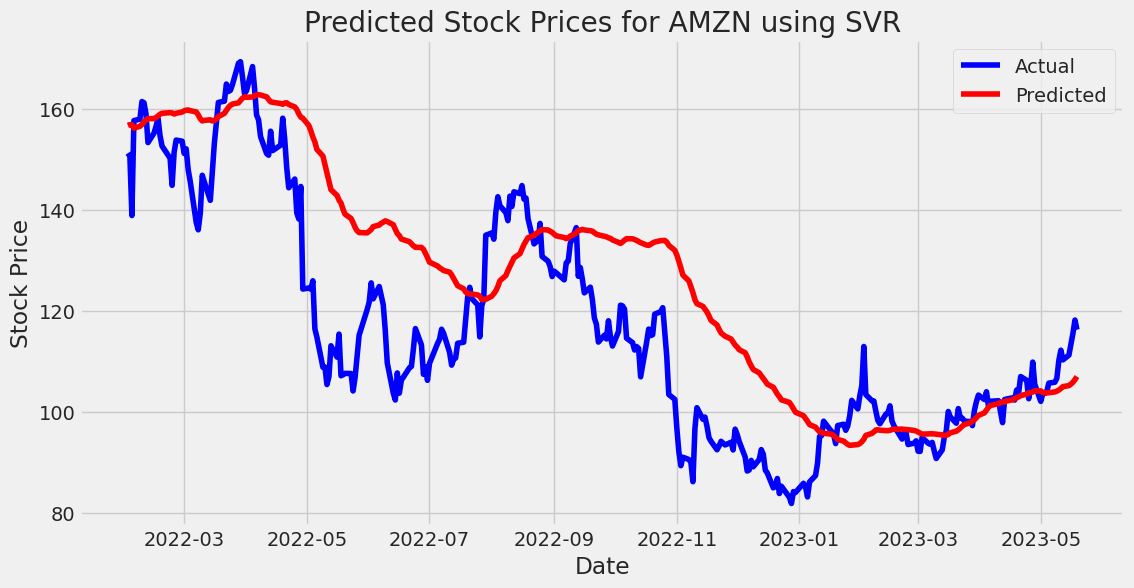

RMSE for AAPL using LSTM: 4.86746449123828
RMSE for AAPL using SVR: 39.550009118195895

RMSE for GOOG using LSTM: 6.853873176040828
RMSE for GOOG using SVR: 7.164051135736128

RMSE for MSFT using LSTM: 8.311338857612082
RMSE for MSFT using SVR: 49.45087393469931

RMSE for AMZN using LSTM: 5.757306463110459
RMSE for AMZN using SVR: 15.993826616673271



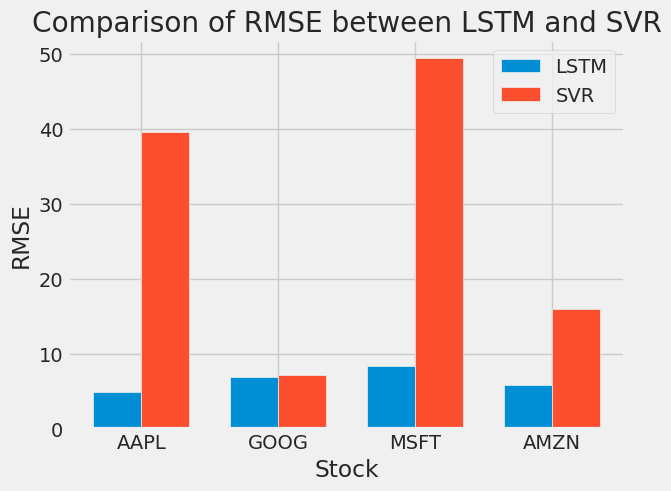

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

yf.pdr_override()

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 100, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

# Define the function to calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Define the function to predict stock prices using LSTM
def predict_stock_prices_lstm(stock):
    # Get the stock quote
    df_stock = company_list[tech_list.index(stock)]

    # Create a new dataframe with only the 'Close' column
    data = df_stock.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values

    # Get the number of rows to train the model on
    training_data_len = int(np.ceil(len(dataset) * .95))

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Create the training data set
    train_data = scaled_data[0:training_data_len, :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data for LSTM model
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Create a new LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Prepare the testing data
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    # Reshape the data for LSTM model
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Make predictions using the LSTM model
    lstm_predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(lstm_predictions)

    # Plot the actual stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(df_stock.index[training_data_len:], dataset[training_data_len:], label='Actual', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Actual Stock Prices for {stock}')
    plt.legend()
    plt.show()

    # Plot the predicted stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(df_stock.index[training_data_len:], dataset[training_data_len:], label='Actual', color='blue')
    plt.plot(df_stock.index[training_data_len:], predictions, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Predicted Stock Prices for {stock} using LSTM')
    plt.legend()
    plt.show()

    # Calculate and return RMSE
    lstm_rmse = calculate_rmse(dataset[training_data_len:], predictions)
    return lstm_rmse

# Define the function to predict stock prices using SVR
def predict_stock_prices_svr(stock):
    # Get the stock quote
    df_stock = company_list[tech_list.index(stock)]

    # Create a new dataframe with only the 'Close' column
    data = df_stock.filter(['Close'])
    # Convert the dataframe to a numpy array
    dataset = data.values

    # Get the number of rows to train the model on
    training_data_len = int(np.ceil(len(dataset) * .95))

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Create the training data set
    train_data = scaled_data[0:training_data_len, :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Create a new SVR model
    model = SVR(kernel='rbf', C=1e3, gamma=0.1)

    # Train the model
    model.fit(x_train, y_train)

    # Prepare the testing data
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)

    # Make predictions using the SVR model
    svr_predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(svr_predictions.reshape(-1, 1))

    # Plot the actual stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(df_stock.index[training_data_len:], dataset[training_data_len:], label='Actual', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Actual Stock Prices for {stock}')
    plt.legend()
    plt.show()

    # Plot the predicted stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(df_stock.index[training_data_len:], dataset[training_data_len:], label='Actual', color='blue')
    plt.plot(df_stock.index[training_data_len:], predictions, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Predicted Stock Prices for {stock} using SVR')
    plt.legend()
    plt.show()

    # Calculate and return RMSE
    svr_rmse = calculate_rmse(dataset[training_data_len:], predictions)
    return svr_rmse

# Predict stock prices using LSTM and SVR for each stock in the tech_list
lstm_rmse_list = []
svr_rmse_list = []

for stock in tech_list:
    lstm_rmse = predict_stock_prices_lstm(stock)
    lstm_rmse_list.append(lstm_rmse)

    svr_rmse = predict_stock_prices_svr(stock)
    svr_rmse_list.append(svr_rmse)

# Display the RMSE for LSTM and SVR models
for stock, lstm_rmse, svr_rmse in zip(tech_list, lstm_rmse_list, svr_rmse_list):
    print(f"RMSE for {stock} using LSTM: {lstm_rmse}")
    print(f"RMSE for {stock} using SVR: {svr_rmse}")
    print()


# Data for plotting
labels = tech_list
lstm_rmse = lstm_rmse_list
svr_rmse = svr_rmse_list

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(labels))

# Plotting the data
plt.bar(x - bar_width/2, lstm_rmse, width=bar_width, label='LSTM')
plt.bar(x + bar_width/2, svr_rmse, width=bar_width, label='SVR')
plt.xlabel('Stock')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between LSTM and SVR')
plt.xticks(x, labels)
plt.legend()
plt.show()